# Experiment 1ANH

We repeat 1A2H but gradually increase the number of raters we sample from 2 to N. We show that other metrics also approach true score value. 

In [10]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

import json

#from rsmtool.prmse_utils import compute_prmse_generalized
%matplotlib inline

In [4]:
df = pd.read_csv('../data/data.csv')
df['system'] = df['sys_7']
config = json.load(open('settings.json'))
N_responses = config['N_responses']
N_raters = config['N_raters']

In [5]:
# compute the cumulative mean of human scores
human_columns = ['h_{}'.format(h) for h in range(1, N_raters+1)]
df_agg = df[human_columns].expanding(min_periods=1, axis=1).mean()

In [6]:
# baseline
# baseline: system correlation with true score. 
true_corr = pearsonr(df['system'], df['true'])[0]
true_r2 = r2_score(df['true'], df['system'])
true_corr, true_r2

(0.8093209148854923, 0.4767431000540935)

In [7]:
# We compute various metrics for an increasing N raters
# compute correlations with aggregated scores (we already did this for Exp Trivial)
df_agg.index=df.index
corrs_mean = df_agg.corrwith(df['system'])
corrs_mean.index=range(1, N_raters+1)

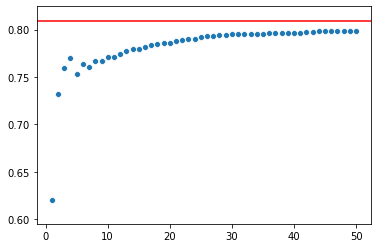

In [13]:
ax=sns.scatterplot(data=corrs_mean)
ax.axhline(true_corr, color='red')

In [16]:
# compute r2 with aggregated scores
r2_mean = []
for h in human_columns:
    r2_mean.append(r2_score(df_agg[h], df['system']))
r2_mean = pd.Series(r2_mean)

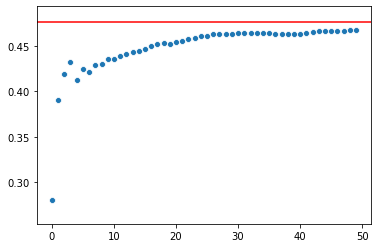

In [18]:
ax=sns.scatterplot(data=r2_mean)
ax.axhline(true_r2, color='red')

In [ ]:
# now compute prmse for increasing number of raters
prmse = []
for i in range(2, min(50, N_raters):
    if i%10 == 0:
        print(i)
    prmse.append(compute_prmse_generalized(df, human_score_columns=human_columns[0:i],
                                          system_score_columns=['system']))
df_prmse = pd.concat(prmse)

In [ ]:
df_prmse